In [80]:
import numpy as np 
import pandas as pd

In [81]:
base_path = "NIAPU/NIAPU/"

In [82]:
nedbit_path = "src/nedbit_features_large_19_03_5000"
df_nebit_features = pd.read_csv(base_path + nedbit_path, sep=",")
df_nebit_features

,name,class,degree,ring,NetRank,NetShort,HeatDiff,InfoDiff
0,cg00394221_FCRL1,1,1587,1,0.857932,855.72580,0.420287,4.896159e-01
1,cg01343097_OR2M1P,1,1070,1,0.618345,1017.75200,1.552562,4.967438e-01
2,cg01833436_SDCCAG8,1,1815,1,0.573039,1166.47200,1.935027,4.881513e-01
3,cg01833436_AKT3,1,1815,1,0.573039,1166.47200,1.935027,4.881513e-01
4,cg01943585_CTTNBP2NL,1,1815,1,0.856858,869.86950,0.480816,4.848949e-01
...,...,...,...,...,...,...,...,...
6003,cg07990939_CEP290,0,1,3,2.893641,58.09145,0.001969,3.152269e-05
6004,cg01749491_EVX2,0,1,3,2.963427,64.29779,0.000740,6.346930e-05
6005,cg20610838_FLCN,0,2,3,2.934690,72.45837,0.000013,3.719597e-03
6006,cg00972313_ADARB2,0,1,4,3.890546,38.37473,0.000291,1.484008e-07


In [83]:
nebit_features = df_nebit_features.iloc[:, 3:]
nebit_features

,ring,NetRank,NetShort,HeatDiff,InfoDiff
0,1,0.857932,855.72580,0.420287,4.896159e-01
1,1,0.618345,1017.75200,1.552562,4.967438e-01
2,1,0.573039,1166.47200,1.935027,4.881513e-01
3,1,0.573039,1166.47200,1.935027,4.881513e-01
4,1,0.856858,869.86950,0.480816,4.848949e-01
...,...,...,...,...,...
6003,3,2.893641,58.09145,0.001969,3.152269e-05
6004,3,2.963427,64.29779,0.000740,6.346930e-05
6005,3,2.934690,72.45837,0.000013,3.719597e-03
6006,4,3.890546,38.37473,0.000291,1.484008e-07


In [84]:
# normalise NetShort feature

from sklearn.preprocessing import normalize, RobustScaler

netshort = np.array(nebit_features["NetShort"].tolist())
netshort = netshort.reshape(-1, 1)
print(len(netshort), netshort.shape)
transformer = RobustScaler().fit(netshort)
#norm_netshort = normalize(netshort, norm="l2")
norm_netshort = transformer.transform(netshort)
norm_netshort

6008 (6008, 1)


array([[ 0.68044698],
       [ 0.95634368],
       [ 1.20958271],
       ...,
       [-0.65329348],
       [-0.71133079],
       [-0.67444919]])

In [85]:
nebit_features["NetShort"] = norm_netshort
nebit_features

,ring,NetRank,NetShort,HeatDiff,InfoDiff
0,1,0.857932,0.680447,0.420287,4.896159e-01
1,1,0.618345,0.956344,1.552562,4.967438e-01
2,1,0.573039,1.209583,1.935027,4.881513e-01
3,1,0.573039,1.209583,1.935027,4.881513e-01
4,1,0.856858,0.704531,0.480816,4.848949e-01
...,...,...,...,...,...
6003,3,2.893641,-0.677757,0.001969,3.152269e-05
6004,3,2.963427,-0.667189,0.000740,6.346930e-05
6005,3,2.934690,-0.653293,0.000013,3.719597e-03
6006,4,3.890546,-0.711331,0.000291,1.484008e-07


In [86]:
output_gene_ranking_path = "src/output_gene_ranking_5000"
df_apu_labels = pd.read_csv(base_path + output_gene_ranking_path, sep=" ", header=None)
df_apu_labels

,0,1,2
0,cg00394221_FCRL1,1.063132,1
1,cg01343097_OR2M1P,1.046629,1
2,cg01833436_SDCCAG8,1.024544,1
3,cg01833436_AKT3,1.024544,1
4,cg01943585_CTTNBP2NL,1.053805,1
...,...,...,...
6003,cg07990939_CEP290,0.117576,2
6004,cg01749491_EVX2,0.117497,2
6005,cg20610838_FLCN,0.119100,2
6006,cg00972313_ADARB2,3.095040,2


In [87]:
l_name = list()
l_labels = list()
for item in df_apu_labels.iterrows():
    #print(item[1])
    #row = item[1].values[0].split(" ")
    l_name.append(item[1][0])
    l_labels.append(item[1][2])

df_labels = pd.DataFrame(zip(l_name, l_labels), columns=["feature_name", "labels"])
df_labels

,feature_name,labels
0,cg00394221_FCRL1,1
1,cg01343097_OR2M1P,1
2,cg01833436_SDCCAG8,1
3,cg01833436_AKT3,1
4,cg01943585_CTTNBP2NL,1
...,...,...
6003,cg07990939_CEP290,2
6004,cg01749491_EVX2,2
6005,cg20610838_FLCN,2
6006,cg00972313_ADARB2,2


In [88]:
labels = df_labels["labels"].tolist()

In [89]:
import umap

n_neighbors=10 #5
min_dist=0.99 #0.3
metric='correlation'

embeddings = umap.UMAP(n_neighbors=n_neighbors,
                       min_dist=min_dist,
                       metric='correlation').fit_transform(nebit_features)

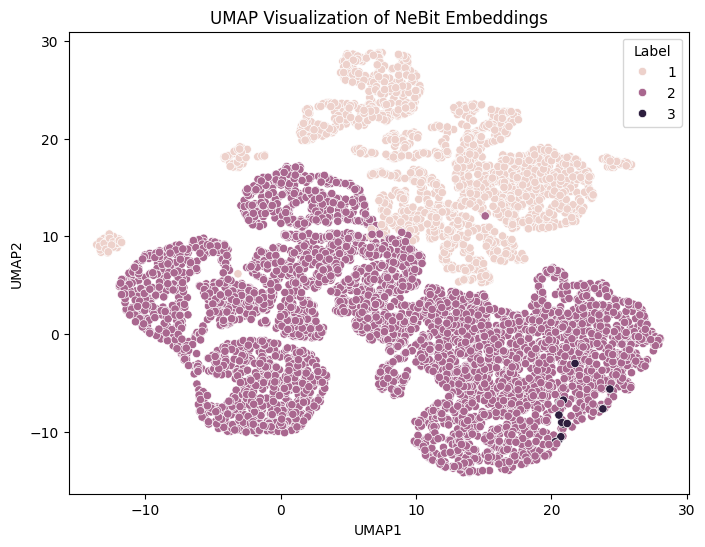

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with UMAP components and labels
data = {"UMAP1": embeddings[:, 0], "UMAP2": embeddings[:, 1], "Label": labels}
df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x="UMAP1", y="UMAP2", hue="Label", data=df) #, palette="viridis", s=50, alpha=0.9
plt.title("UMAP Visualization of NeBit Embeddings")
plt.savefig(base_path + "umap_nebit_features.pdf")
plt.show()

In [91]:
df_merged_signals = pd.read_csv("../nanodiag_datasets/GSE175758/merged_signals.csv", sep="\t", engine="c")
df_merged_signals

,cg23954847_TFE3,cg00000957_NPHP4,cg00001349_MAEL,cg00001364_PROX1,cg00001446_ELOVL1,cg00001534_FAF1,cg00001583_NR5A2,cg00002028_PINK1,cg00002028_PINK1.1,cg00002593_TAS1R3,...,ch.22.533187F_HMOX1,ch.22.569473R_FOXRED2,ch.22.694298R_GRAP2,ch.22.707968R_ADSL,ch.22.728807R_RBX1,ch.22.734399R_EP300,ch.22.740407F_RANGAP1,ch.22.757911F_XRCC6,ch.22.772318F_NAGA,ch.22.909671F_ATXN10
0,0.864672,0.919098,0.931214,0.825985,0.841873,0.905513,0.902962,0.052570,0.052570,0.831665,...,0.042048,0.157289,0.075781,0.038821,0.148307,0.171660,0.044178,0.058824,0.035193,0.129464
1,0.732438,0.884181,0.862162,0.758616,0.782469,0.853061,0.324640,0.091551,0.091551,0.797655,...,0.062322,0.143155,0.129497,0.056417,0.138343,0.172133,0.061292,0.060908,0.066473,0.164508
2,0.870964,0.896988,0.917439,0.798168,0.788342,0.883873,0.064378,0.041799,0.041799,0.831371,...,0.064128,0.155809,0.169524,0.091728,0.174972,0.202347,0.092773,0.067895,0.066007,0.167633
3,0.770894,0.896535,0.923548,0.781703,0.810133,0.898413,0.146580,0.061871,0.061871,0.788763,...,0.051624,0.156234,0.075386,0.058948,0.142429,0.209881,0.061288,0.065006,0.063020,0.174391
4,0.793325,0.900545,0.890331,0.753394,0.816442,0.874389,0.283989,0.044948,0.044948,0.789155,...,0.029399,0.112743,0.047210,0.025311,0.120706,0.158879,0.033180,0.039391,0.030883,0.108496
5,0.771238,0.881966,0.885884,0.706935,0.789394,0.844779,0.052274,0.058234,0.058234,0.768430,...,0.050518,0.144294,0.078152,0.046610,0.170648,0.172923,0.054839,0.068701,0.098243,0.220538
6,0.818622,0.858326,0.837925,0.785126,0.798059,0.887452,0.191977,0.062295,0.062295,0.477000,...,0.068426,0.181990,0.159486,0.043905,0.184506,0.147676,0.056958,0.065455,0.091866,0.168706
7,0.719042,0.888057,0.864124,0.758313,0.781905,0.884818,0.390451,0.088711,0.088711,0.825365,...,0.068621,0.154173,0.102731,0.059434,0.186476,0.138332,0.082228,0.073743,0.098911,0.185174
8,0.775340,0.892561,0.908382,0.771167,0.835124,0.877090,0.669288,0.088306,0.088306,0.788113,...,0.052823,0.139850,0.063330,0.047713,0.147007,0.168616,0.062604,0.070394,0.072000,0.148210
9,0.430085,0.882614,0.871273,0.797262,0.808716,0.878163,0.145391,0.072168,0.072168,0.823876,...,0.070245,0.171744,0.099462,0.066413,0.207633,0.188526,0.064079,0.077805,0.120990,0.165222


In [92]:
feature_names = df_labels["feature_name"].tolist()
#feature_names[:20]

In [93]:
dnam_signals = df_merged_signals[feature_names]
dnam_signals

,cg00394221_FCRL1,cg01343097_OR2M1P,cg01833436_SDCCAG8,cg01833436_AKT3,cg01943585_CTTNBP2NL,cg01971755_KIF21B,cg02395088_KIF21B,cg03138364_PBX1,cg04012896_KIF21B,cg05365320_KIF21B,...,cg20609368_HBD,cg05567709_DDX28.1,cg14321697_ACCN1.1,cg14151426_CUL4A,cg15764953_CPS1,cg07990939_CEP290,cg01749491_EVX2,cg20610838_FLCN,cg00972313_ADARB2,cg16914667_ANAPC5
0,0.884223,0.867871,0.872817,0.872817,0.897189,0.817078,0.820187,0.794427,0.857376,0.854060,...,0.917003,0.041931,0.448983,0.045588,0.033235,0.078890,0.902461,0.885953,0.940060,0.072327
1,0.854487,0.857484,0.789144,0.789144,0.821908,0.773998,0.730111,0.737284,0.823814,0.784603,...,0.832160,0.052453,0.668416,0.057169,0.055181,0.071215,0.879213,0.856539,0.783801,0.081373
2,0.893978,0.886596,0.889303,0.889303,0.888078,0.819319,0.812884,0.786059,0.889765,0.841955,...,0.898075,0.041758,0.687254,0.068463,0.023230,0.067513,0.730055,0.822502,0.517004,0.059221
3,0.877296,0.873939,0.840657,0.840657,0.883874,0.784236,0.796373,0.751683,0.839087,0.831785,...,0.894145,0.043946,0.461450,0.059001,0.043940,0.070775,0.056838,0.856425,0.838782,0.058966
4,0.881579,0.853442,0.844308,0.844308,0.865828,0.783336,0.751091,0.739205,0.840999,0.821238,...,0.868296,0.009094,0.646115,0.049750,0.029089,0.065138,0.969248,0.893988,0.529997,0.061421
5,0.910560,0.823514,0.841471,0.841471,0.890614,0.772965,0.777069,0.738706,0.837281,0.787695,...,0.872514,0.036977,0.656635,0.046747,0.058111,0.071131,0.502280,0.841371,0.524469,0.046778
6,0.858944,0.847107,0.849658,0.849658,0.865500,0.799981,0.782407,0.777952,0.843815,0.816858,...,0.861932,0.035425,0.636332,0.059663,0.048211,0.072130,0.095376,0.867825,0.161911,0.068700
7,0.851166,0.919482,0.833542,0.833542,0.871604,0.746870,0.787337,0.758583,0.816869,0.816591,...,0.822481,0.037071,0.659974,0.045540,0.035701,0.065675,0.932079,0.917927,0.250221,0.062222
8,0.897877,0.842623,0.833725,0.833725,0.876568,0.820771,0.798011,0.706786,0.871555,0.849428,...,0.906542,0.043562,0.623960,0.044504,0.027175,0.053300,0.937162,0.919697,0.439587,0.058899
9,0.884387,0.810016,0.834115,0.834115,0.833997,0.818702,0.787915,0.785772,0.836500,0.817566,...,0.881925,0.048147,0.676428,0.057501,0.037932,0.067399,0.521011,0.855638,0.635147,0.057778


In [94]:
dnam_signals_transpose = dnam_signals.transpose()
dnam_signals_transpose

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
cg00394221_FCRL1,0.884223,0.854487,0.893978,0.877296,0.881579,0.910560,0.858944,0.851166,0.897877,0.884387,...,0.786619,0.806122,0.733738,0.840141,0.849497,0.756017,0.620907,0.856155,0.750356,0.828218
cg01343097_OR2M1P,0.867871,0.857484,0.886596,0.873939,0.853442,0.823514,0.847107,0.919482,0.842623,0.810016,...,0.794854,0.806875,0.755603,0.808511,0.814268,0.803220,0.610015,0.846208,0.745212,0.786768
cg01833436_SDCCAG8,0.872817,0.789144,0.889303,0.840657,0.844308,0.841471,0.849658,0.833542,0.833725,0.834115,...,0.717554,0.577939,0.574938,0.722235,0.703800,0.531066,0.485280,0.664450,0.555493,0.618902
cg01833436_AKT3,0.872817,0.789144,0.889303,0.840657,0.844308,0.841471,0.849658,0.833542,0.833725,0.834115,...,0.717554,0.577939,0.574938,0.722235,0.703800,0.531066,0.485280,0.664450,0.555493,0.618902
cg01943585_CTTNBP2NL,0.897189,0.821908,0.888078,0.883874,0.865828,0.890614,0.865500,0.871604,0.876568,0.833997,...,0.808522,0.772557,0.715598,0.835946,0.826819,0.696854,0.633762,0.838050,0.684022,0.754492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cg07990939_CEP290,0.078890,0.071215,0.067513,0.070775,0.065138,0.071131,0.072130,0.065675,0.053300,0.067399,...,0.060994,0.065057,0.069638,0.068045,0.087310,0.062088,0.060726,0.050991,0.062335,0.075591
cg01749491_EVX2,0.902461,0.879213,0.730055,0.056838,0.969248,0.502280,0.095376,0.932079,0.937162,0.521011,...,0.898671,0.811832,0.430463,0.930286,0.026702,0.644554,0.457239,0.808165,0.183041,0.796995
cg20610838_FLCN,0.885953,0.856539,0.822502,0.856425,0.893988,0.841371,0.867825,0.917927,0.919697,0.855638,...,0.858656,0.873023,0.809180,0.841121,0.859327,0.839932,0.837738,0.879284,0.818070,0.863367
cg00972313_ADARB2,0.940060,0.783801,0.517004,0.838782,0.529997,0.524469,0.161911,0.250221,0.439587,0.635147,...,0.275860,0.420460,0.595424,0.726587,0.508972,0.759855,0.695258,0.737149,0.648084,0.656091


In [95]:
dnam_signals_transpose = dnam_signals_transpose.reset_index()
dnam_signals_transpose

,index,0,1,2,3,4,5,6,7,8,...,24,25,26,27,28,29,30,31,32,33
0,cg00394221_FCRL1,0.884223,0.854487,0.893978,0.877296,0.881579,0.910560,0.858944,0.851166,0.897877,...,0.786619,0.806122,0.733738,0.840141,0.849497,0.756017,0.620907,0.856155,0.750356,0.828218
1,cg01343097_OR2M1P,0.867871,0.857484,0.886596,0.873939,0.853442,0.823514,0.847107,0.919482,0.842623,...,0.794854,0.806875,0.755603,0.808511,0.814268,0.803220,0.610015,0.846208,0.745212,0.786768
2,cg01833436_SDCCAG8,0.872817,0.789144,0.889303,0.840657,0.844308,0.841471,0.849658,0.833542,0.833725,...,0.717554,0.577939,0.574938,0.722235,0.703800,0.531066,0.485280,0.664450,0.555493,0.618902
3,cg01833436_AKT3,0.872817,0.789144,0.889303,0.840657,0.844308,0.841471,0.849658,0.833542,0.833725,...,0.717554,0.577939,0.574938,0.722235,0.703800,0.531066,0.485280,0.664450,0.555493,0.618902
4,cg01943585_CTTNBP2NL,0.897189,0.821908,0.888078,0.883874,0.865828,0.890614,0.865500,0.871604,0.876568,...,0.808522,0.772557,0.715598,0.835946,0.826819,0.696854,0.633762,0.838050,0.684022,0.754492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6003,cg07990939_CEP290,0.078890,0.071215,0.067513,0.070775,0.065138,0.071131,0.072130,0.065675,0.053300,...,0.060994,0.065057,0.069638,0.068045,0.087310,0.062088,0.060726,0.050991,0.062335,0.075591
6004,cg01749491_EVX2,0.902461,0.879213,0.730055,0.056838,0.969248,0.502280,0.095376,0.932079,0.937162,...,0.898671,0.811832,0.430463,0.930286,0.026702,0.644554,0.457239,0.808165,0.183041,0.796995
6005,cg20610838_FLCN,0.885953,0.856539,0.822502,0.856425,0.893988,0.841371,0.867825,0.917927,0.919697,...,0.858656,0.873023,0.809180,0.841121,0.859327,0.839932,0.837738,0.879284,0.818070,0.863367
6006,cg00972313_ADARB2,0.940060,0.783801,0.517004,0.838782,0.529997,0.524469,0.161911,0.250221,0.439587,...,0.275860,0.420460,0.595424,0.726587,0.508972,0.759855,0.695258,0.737149,0.648084,0.656091


In [96]:
dnam_features = dnam_signals_transpose.iloc[:, 1:]
dnam_features

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.884223,0.854487,0.893978,0.877296,0.881579,0.910560,0.858944,0.851166,0.897877,0.884387,...,0.786619,0.806122,0.733738,0.840141,0.849497,0.756017,0.620907,0.856155,0.750356,0.828218
1,0.867871,0.857484,0.886596,0.873939,0.853442,0.823514,0.847107,0.919482,0.842623,0.810016,...,0.794854,0.806875,0.755603,0.808511,0.814268,0.803220,0.610015,0.846208,0.745212,0.786768
2,0.872817,0.789144,0.889303,0.840657,0.844308,0.841471,0.849658,0.833542,0.833725,0.834115,...,0.717554,0.577939,0.574938,0.722235,0.703800,0.531066,0.485280,0.664450,0.555493,0.618902
3,0.872817,0.789144,0.889303,0.840657,0.844308,0.841471,0.849658,0.833542,0.833725,0.834115,...,0.717554,0.577939,0.574938,0.722235,0.703800,0.531066,0.485280,0.664450,0.555493,0.618902
4,0.897189,0.821908,0.888078,0.883874,0.865828,0.890614,0.865500,0.871604,0.876568,0.833997,...,0.808522,0.772557,0.715598,0.835946,0.826819,0.696854,0.633762,0.838050,0.684022,0.754492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6003,0.078890,0.071215,0.067513,0.070775,0.065138,0.071131,0.072130,0.065675,0.053300,0.067399,...,0.060994,0.065057,0.069638,0.068045,0.087310,0.062088,0.060726,0.050991,0.062335,0.075591
6004,0.902461,0.879213,0.730055,0.056838,0.969248,0.502280,0.095376,0.932079,0.937162,0.521011,...,0.898671,0.811832,0.430463,0.930286,0.026702,0.644554,0.457239,0.808165,0.183041,0.796995
6005,0.885953,0.856539,0.822502,0.856425,0.893988,0.841371,0.867825,0.917927,0.919697,0.855638,...,0.858656,0.873023,0.809180,0.841121,0.859327,0.839932,0.837738,0.879284,0.818070,0.863367
6006,0.940060,0.783801,0.517004,0.838782,0.529997,0.524469,0.161911,0.250221,0.439587,0.635147,...,0.275860,0.420460,0.595424,0.726587,0.508972,0.759855,0.695258,0.737149,0.648084,0.656091


In [97]:
n_neighbors=10 #5
min_dist=0.99 #0.3
metric='correlation'

dnam_embeddings = umap.UMAP(n_neighbors=n_neighbors,
                       min_dist=min_dist,
                       metric='correlation').fit_transform(dnam_features)

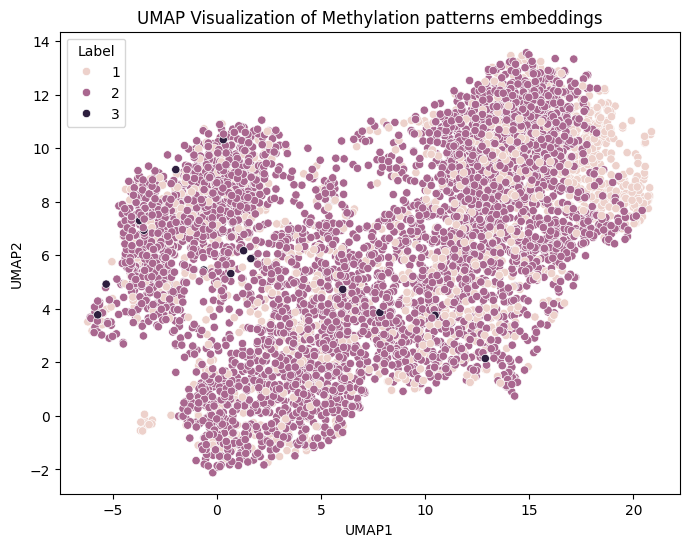

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with UMAP components and labels
data = {"UMAP1": dnam_embeddings[:, 0], "UMAP2": dnam_embeddings[:, 1], "Label": labels}
df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x="UMAP1", y="UMAP2", hue="Label", data=df) #, palette="viridis", s=50, alpha=0.9
plt.title("UMAP Visualization of Methylation patterns embeddings")
plt.savefig(base_path + "umap_dnam_features.pdf")
plt.show()

In [99]:
nebit_dnam_features = pd.concat([nebit_features, dnam_signals_transpose.iloc[:, 1:]], axis=1)
nebit_dnam_features

,ring,NetRank,NetShort,HeatDiff,InfoDiff,0,1,2,3,4,...,24,25,26,27,28,29,30,31,32,33
0,1,0.857932,0.680447,0.420287,4.896159e-01,0.884223,0.854487,0.893978,0.877296,0.881579,...,0.786619,0.806122,0.733738,0.840141,0.849497,0.756017,0.620907,0.856155,0.750356,0.828218
1,1,0.618345,0.956344,1.552562,4.967438e-01,0.867871,0.857484,0.886596,0.873939,0.853442,...,0.794854,0.806875,0.755603,0.808511,0.814268,0.803220,0.610015,0.846208,0.745212,0.786768
2,1,0.573039,1.209583,1.935027,4.881513e-01,0.872817,0.789144,0.889303,0.840657,0.844308,...,0.717554,0.577939,0.574938,0.722235,0.703800,0.531066,0.485280,0.664450,0.555493,0.618902
3,1,0.573039,1.209583,1.935027,4.881513e-01,0.872817,0.789144,0.889303,0.840657,0.844308,...,0.717554,0.577939,0.574938,0.722235,0.703800,0.531066,0.485280,0.664450,0.555493,0.618902
4,1,0.856858,0.704531,0.480816,4.848949e-01,0.897189,0.821908,0.888078,0.883874,0.865828,...,0.808522,0.772557,0.715598,0.835946,0.826819,0.696854,0.633762,0.838050,0.684022,0.754492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6003,3,2.893641,-0.677757,0.001969,3.152269e-05,0.078890,0.071215,0.067513,0.070775,0.065138,...,0.060994,0.065057,0.069638,0.068045,0.087310,0.062088,0.060726,0.050991,0.062335,0.075591
6004,3,2.963427,-0.667189,0.000740,6.346930e-05,0.902461,0.879213,0.730055,0.056838,0.969248,...,0.898671,0.811832,0.430463,0.930286,0.026702,0.644554,0.457239,0.808165,0.183041,0.796995
6005,3,2.934690,-0.653293,0.000013,3.719597e-03,0.885953,0.856539,0.822502,0.856425,0.893988,...,0.858656,0.873023,0.809180,0.841121,0.859327,0.839932,0.837738,0.879284,0.818070,0.863367
6006,4,3.890546,-0.711331,0.000291,1.484008e-07,0.940060,0.783801,0.517004,0.838782,0.529997,...,0.275860,0.420460,0.595424,0.726587,0.508972,0.759855,0.695258,0.737149,0.648084,0.656091


In [100]:
n_neighbors=10 #5
min_dist=0.99 #0.3
metric='correlation'

nebit_dnam_embeddings = umap.UMAP(n_neighbors=n_neighbors,
                       min_dist=min_dist,
                       metric='correlation').fit_transform(nebit_dnam_features)

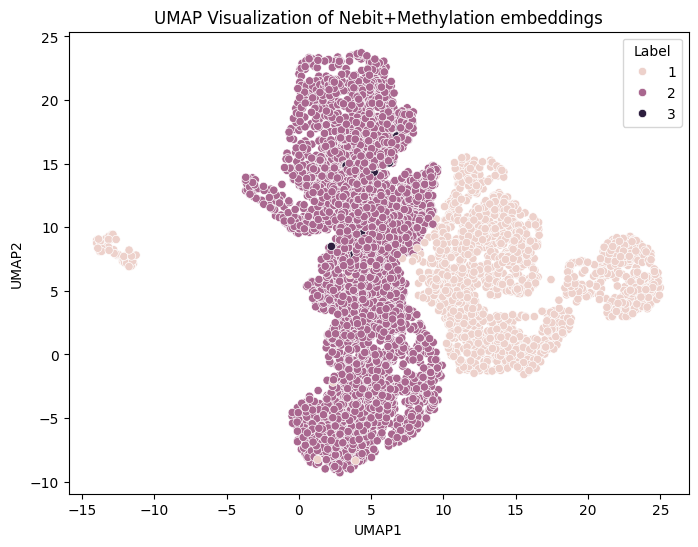

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with UMAP components and labels
data = {"UMAP1": nebit_dnam_embeddings[:, 0], "UMAP2": nebit_dnam_embeddings[:, 1], "Label": labels}
df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x="UMAP1", y="UMAP2", hue="Label", data=df) #, palette="viridis", s=50, alpha=0.9
plt.title("UMAP Visualization of Nebit+Methylation embeddings")
plt.savefig(base_path + "umap_nebit_dnam_features.pdf")
plt.show()

In [102]:
df_nebit_dnam_features = nebit_dnam_features

In [103]:
df_nebit_dnam_features["labels"] = labels

In [104]:
df_nebit_dnam_features.to_csv("../nanodiag_datasets/GSE175758/naipu_processed_files/df_nebit_dnam_features.csv", 
                              sep="\t", header=None, index=None)



In [105]:
feature_gene_names = dnam_signals_transpose.iloc[0:, 0]
feature_gene_names

0           cg00394221_FCRL1
1          cg01343097_OR2M1P
2         cg01833436_SDCCAG8
3            cg01833436_AKT3
4       cg01943585_CTTNBP2NL
                ...         
6003       cg07990939_CEP290
6004         cg01749491_EVX2
6005         cg20610838_FLCN
6006       cg00972313_ADARB2
6007       cg16914667_ANAPC5
Name: index, Length: 6008, dtype: object

In [106]:
df_feature_names = pd.DataFrame(feature_gene_names)
df_feature_names.to_csv("../nanodiag_datasets/GSE175758/naipu_processed_files/df_feature_names.csv", 
                              sep="\t", index=None)
df_feature_names

,index
0,cg00394221_FCRL1
1,cg01343097_OR2M1P
2,cg01833436_SDCCAG8
3,cg01833436_AKT3
4,cg01943585_CTTNBP2NL
...,...
6003,cg07990939_CEP290
6004,cg01749491_EVX2
6005,cg20610838_FLCN
6006,cg00972313_ADARB2
